# Continuous Classification ANN with PyTorch

This is a simple implementation of a Deep Learning model for binary classification. The breast cancer dataset available in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# reading the red wine quality dataset
bc_df = pd.read_csv('./datasets/breast_cancer_dataset/data.csv')
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# suffling the dataset
bc_df = shuffle(bc_df, random_state=101)
bc_df.reset_index(drop=True, inplace=True)
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.29,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
1,909220,B,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
2,875878,B,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
3,869104,M,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
4,894335,B,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932


In [4]:
# setting continuous columns and the prediciton column
print(bc_df.columns)

cont_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
y_col = 'diagnosis'

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
# Convert our three categorical columns to category dtypes.
bc_df[y_col] = bc_df[y_col].astype('category')
bc_df.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [6]:
# spliting test and train data
X = bc_df.drop(['id', y_col],axis=1).values
y = bc_df[y_col].cat.codes.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).flatten()
y_test = torch.LongTensor(y_test).flatten()

In [7]:
# Creating the tabular model to the ANN Network 
# Every layer is normalized and have a Dropout Layer, the activation function chosen was ReLU
class TabularModel(nn.Module):
    def __init__(self, n_cont, out_sz, layers, p=0.5):
        """
        @param n_count: input number of features
        @param out_sz: output size 
        @param layers: vector of layers that are the number with number of neurons on that layer e.g. [100, 50]
        @param p: probability of Dropout layer 
        """
        super().__init__()
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_in = n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cont):
        """
        @param x_cont: continous features 
        @return x: vector of predictions
        """
        x = self.bn_cont(x_cont)
        x = self.layers(x)
        return x

In [8]:
# setting seed and 
torch.manual_seed(33)
model = TabularModel(X_train.shape[1], 2, [100, 50], p=0.1)

In [9]:
#displaying model
model

TabularModel(
  (emb_drop): Dropout(p=0.1)
  (bn_cont): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [10]:
 # setting the Loss function and the optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# training the model
# set the number of epochs and the loss vector
epochs = 300
losses = []

# for all epochs, pass the train set into the model, append loss and backpropate based on the error
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 

epoch:  1  loss: 0.66676569
epoch: 11  loss: 0.31254813
epoch: 21  loss: 0.20354941
epoch: 31  loss: 0.14076205
epoch: 41  loss: 0.09953093
epoch: 51  loss: 0.07879446
epoch: 61  loss: 0.05659766
epoch: 71  loss: 0.05042411
epoch: 81  loss: 0.04080084
epoch: 91  loss: 0.03096977
epoch: 101  loss: 0.02784657
epoch: 111  loss: 0.02141514
epoch: 121  loss: 0.01854942
epoch: 131  loss: 0.01689136
epoch: 141  loss: 0.01336741
epoch: 151  loss: 0.01143787
epoch: 161  loss: 0.01058153
epoch: 171  loss: 0.00899924
epoch: 181  loss: 0.00835034
epoch: 191  loss: 0.00697552
epoch: 201  loss: 0.00551236
epoch: 211  loss: 0.00560656
epoch: 221  loss: 0.00631234
epoch: 231  loss: 0.00423123
epoch: 241  loss: 0.00477757
epoch: 251  loss: 0.00441913
epoch: 261  loss: 0.00305797
epoch: 271  loss: 0.00317722
epoch: 281  loss: 0.00384021
epoch: 291  loss: 0.00312033
epoch: 299  loss: 0.00232890


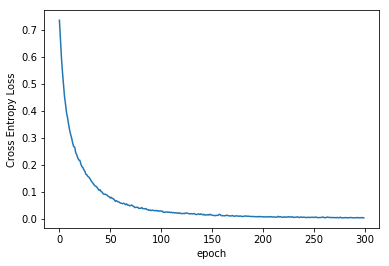

In [12]:
# plotting the loss
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [13]:
# evaluatig the test set passing the test set into the trained model
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.16888779


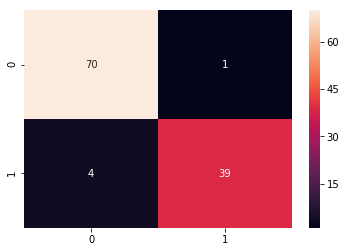

In [14]:
# plotting confusion matrix
rows = len(y_val)
y_pred = []
for i in range(rows):
    y_pred.append(y_val[i].argmax())

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [15]:
# displaying results and comparing with the test value 
rows = len(y_val)
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 3.9938, -3.9944])    0      0   
tensor([-4.4143,  4.7844])    1      1   
tensor([ 2.8347, -2.9864])    0      0   
tensor([ 3.3478, -2.8914])    0      0   
tensor([ 3.8005, -3.6701])    0      0   
tensor([-4.6882,  4.5662])    1      1   
tensor([-4.6473,  4.7886])    1      1   
tensor([ 4.5261, -4.3684])    0      0   
tensor([ 4.4844, -4.6737])    0      0   
tensor([-5.2673,  5.8225])    1      1   
tensor([ 4.0427, -4.2166])    0      0   
tensor([-4.3149,  4.5784])    1      1   
tensor([ 4.9835, -4.5417])    0      0   
tensor([ 3.0405, -3.2488])    0      0   
tensor([-4.7253,  5.3716])    1      1   
tensor([-4.8962,  5.5587])    1      1   
tensor([ 4.2014, -4.1666])    0      0   
tensor([-3.5318,  3.7700])    1      1   
tensor([ 2.8989, -2.6429])    0      0   
tensor([ 3.6378, -3.2527])    0      0   
tensor([ 5.0478, -4.8011])    0      0   
tensor([ 3.1093, -2.7574])    0      0   
tensor([ 3.6436, -3.4202])    0   